<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Supervised-classification" data-toc-modified-id="Supervised-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Supervised classification</a></span></li></ul></div>

# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn import metrics

In [2]:
# Your code here
df=pd.read_csv('data_all.csv', nrows=75000)

In [3]:
df.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data=df.values 
print ('Dimensiones matriz de datos: {}'.format(data.shape))

Dimensiones matriz de datos: (75000, 785)


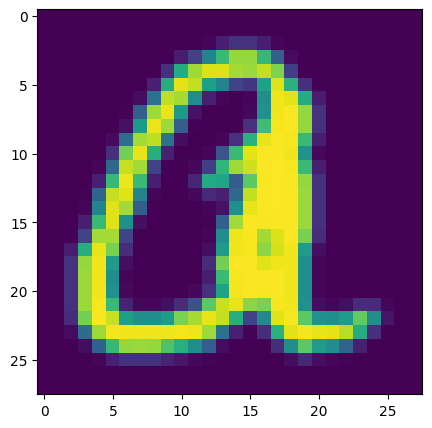

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(data[0,1:].reshape(28,28))  
plt.show()

In [6]:
alfabeto={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',
          10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J',
          20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
          30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z',
          36:'a', 37:'b', 38:'c', 39:'d', 40:'e', 41:'f', 42:'g', 43:'h', 44:'i', 45:'j',
          46:'k', 47:'l', 48:'m', 49:'n', 50:'o', 51:'p', 52:'q', 53:'r', 54:'s', 55:'t',
          56:'u', 57:'v', 58:'w', 59:'x', 60:'y', 61:'z'}

In [7]:
#Creating a map function to link the alfabeto to the e column and classify the data:
df['alfabeto'] = df['e'].map(alfabeto)
df['classification'] = df['e'].map(lambda x: 'number' if 0 <= x <= 9 else ('cap_letter' if 10 <= x <= 35 else 'lower_letter'))
df

,e,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,784,alfabeto,classification
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a,lower_letter
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,number
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,number
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X,cap_letter
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U,cap_letter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r,lower_letter
74996,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t,lower_letter
74997,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,number
74998,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,number


In [8]:
df[['number', 'cap_letter', 'lower_letter']] = pd.get_dummies(df['classification'], dtype="int")
df.drop(columns=["classification", "alfabeto"], inplace=True)
df

,e,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,784,number,cap_letter,lower_letter
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
74996,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
74997,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
74998,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [9]:
# Your code here -> RandomForestClass
X = df.drop(columns = ['number', 'cap_letter', 'lower_letter'])
y = df.cap_letter

X_train, X_test, y_train, y_test = train_test_split(X, y)
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [10]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print("-------------")
print(f"F1 score: {f1_score(y_test, y_pred)}")

Accuracy: 0.9898666666666667
Precision: 0.9995193463109829
Recall: 0.9567517828387394
-------------
F1 score: 0.9776680771039022


In [44]:
#Other Classification Models

models = {
    "disc_analysis": LinearDiscriminantAnalysis(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "svc": SVC()
}

In [ ]:
for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)

Training: disc_analysis
Training: DecisionTreeClassifier
Training: svc


In [ ]:
for name, model in models.items():
    print(f"------------------")
    print(model)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 score: {f1_score(y_test, y_pred)}")

* Try to do the same thing with lowercases.

In [11]:
# Your code here -> RandomForestClass
X = df.drop(columns = ['number', 'cap_letter', 'lower_letter'])
y = df.lower_letter

X_train, X_test, y_train, y_test = train_test_split(X, y)
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print("-------------")
print(f"F1 score: {f1_score(y_test, y_pred)}")

Accuracy: 0.9980266666666666
Precision: 0.9989313955973499
Recall: 0.99712
-------------
F1 score: 0.9980248758874712


* Try to do the same thing with numbers.

In [12]:
# Your code here -> RandomForestClass
X = df.drop(columns = ['number', 'cap_letter', 'lower_letter'])
y = df.number

X_train, X_test, y_train, y_test = train_test_split(X, y)
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print("-------------")
print(f"F1 score: {f1_score(y_test, y_pred)}")

Accuracy: 0.9395733333333334
Precision: 0.9566135084427767
Recall: 0.8114183409588224
-------------
F1 score: 0.8780540307824777
